# A Well- Defined Problem - Seeds Dataset

# Domain:
Botany, seeds, wheat, agriculture for clustering. 
Kernels - the most edible part of the seed. Used in studies and experimental purposes in harvesting. 

# Problem Statement:
1) Input: Description of seeds with 7 dimensions.
<br>
2) Learning: We will be using a classification model.
<br>
3) Outpit: 3 different varieties of wheat. Types/Class of wheat. 

# Metric
We will use accuracy and f-score to access classification model.
BIC on classification and clustering model. Clustering with silhouette score. 

# Data Summary:
n= 210
70 samples for each class. 
<br>
p = 7
<br>
3 classes
<br>
df.describe() in Python or summary() in R
<br>
visualization - pairplot, boxplots. 

# Solution Proposal 
We will use Logistic Regression or glm()

or

Clustering

# Benchmark Model
Guess all are Kama. We will get 1/3. Our model has to be greater than 33% or we have a bad model.

Classes: Kama, Rosa and Canadian

# Plan
1) load the data.
<br>
<br>
2) Visualize the data.
<br>
<br>
3) Benchmark - from sklearn.dummy import DummyClassifier.
dummy.cls = DummyClassifer("most_frequent"). Run it like a normal .fit and .predict. 
<br>
<br>
4) Model Development - Classification
    a) Backward selection - Choosing all features and removing one at a time. 
    b) forward selection - Choose one feature and keep that one. 
    c) Try both and see which yields the best.
<br>
<br>
5) Model Development - Classification
     a) forward selection and add clusters. Use BIC to calculate. 
<br>
<br>
6) train-test-split.
<br>
<br>
7) access the model.

## Load and Visualize SEEDS dataset:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
feature_names = ["area_A", "perimeter_P", "compactness_C",
                 "length_of_kernel", "width_of_kernel", "asymmetry_coeff", 
                 "length_of_kernel_groove", "target"]
feature_names =np.array(feature_names)
feature_names

array(['area_A', 'perimeter_P', 'compactness_C', 'length_of_kernel',
       'width_of_kernel', 'asymmetry_coeff', 'length_of_kernel_groove',
       'target'], 
      dtype='<U23')

In [3]:
SEED = pd.read_csv("Seed_Dataset.csv", header=None)

In [4]:
SEED.columns = feature_names

In [5]:
len(SEED)

210

In [6]:
#Josh's way:
SEEDS_DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt" #direct url of where the data is at.

In [7]:
SEEDS = pd.read_csv(SEEDS_DATA_URL, sep="\s+",header=None)

In [8]:
SEEDS.columns = feature_names

In [9]:
SEEDS.head()

,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coeff,length_of_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [10]:
SEEDS.describe()

,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coeff,length_of_kernel_groove,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


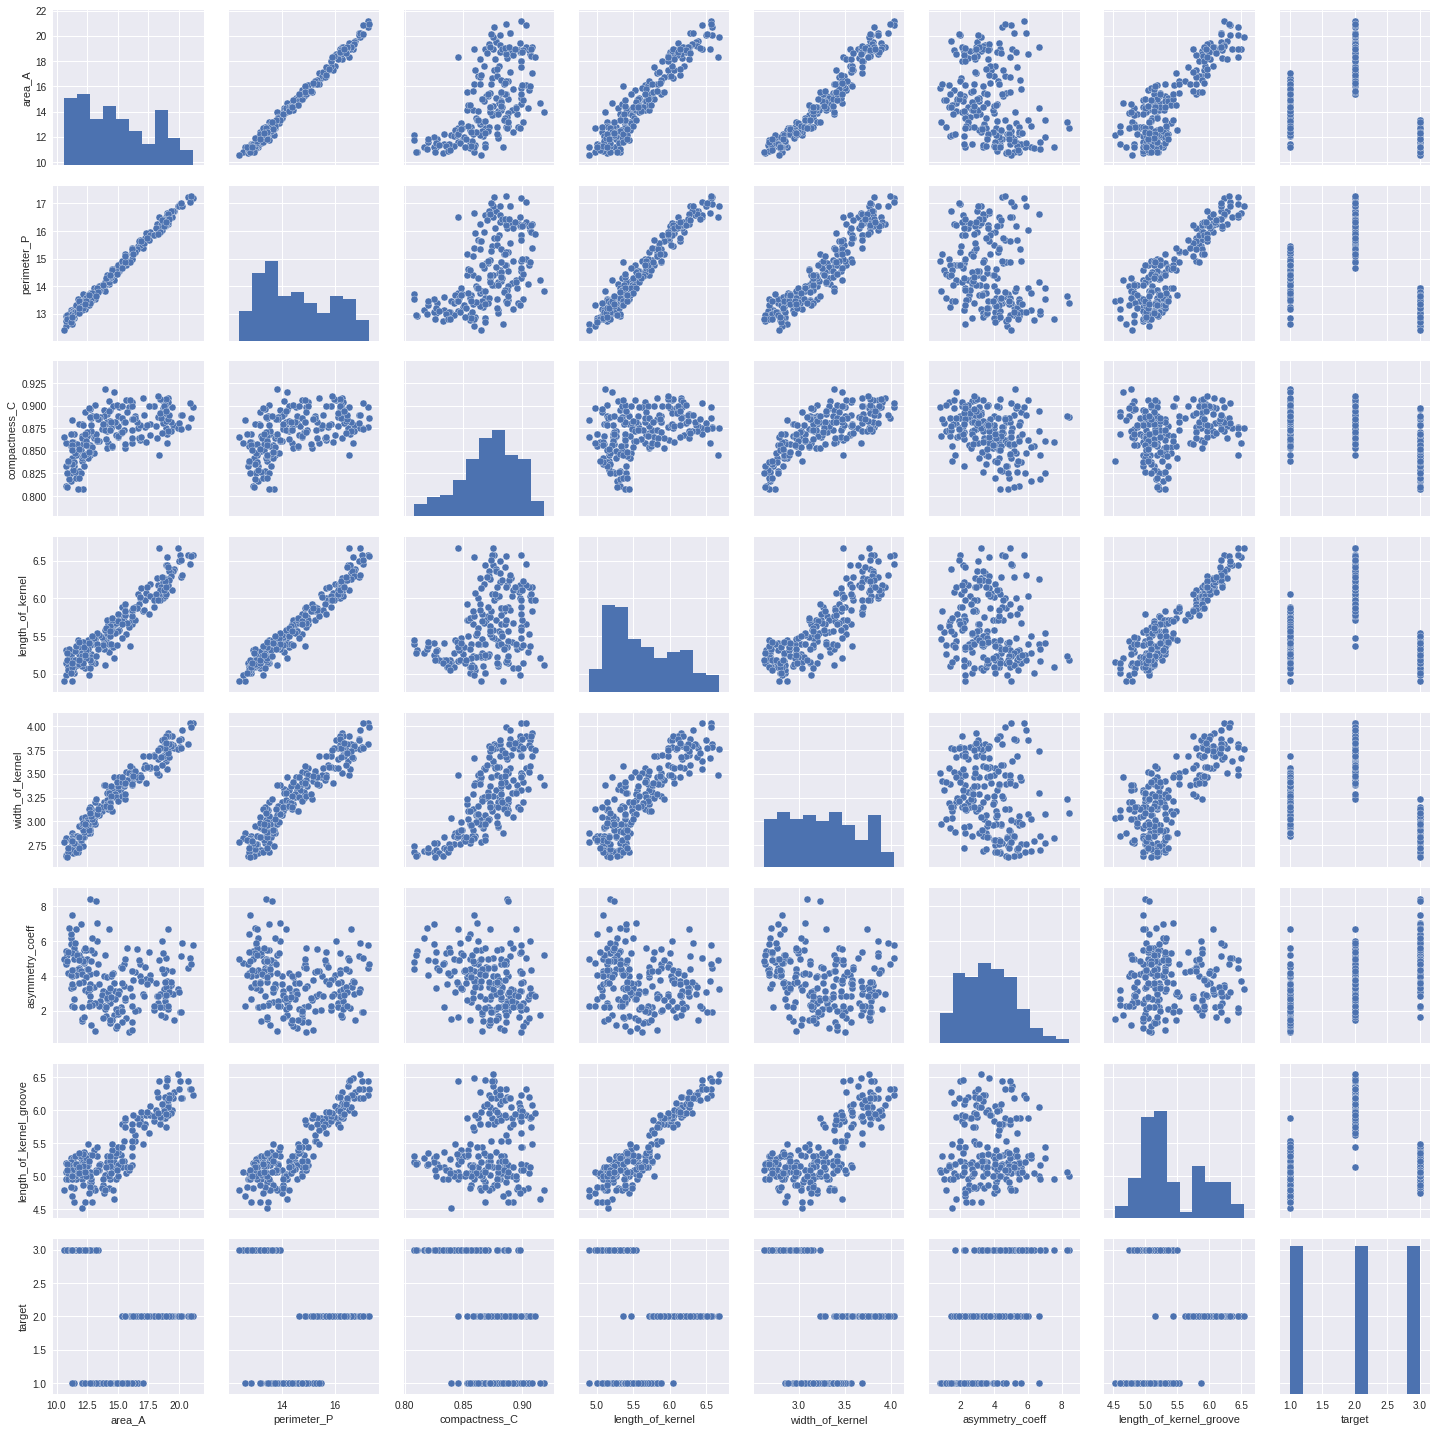

In [11]:
sns.pairplot(SEEDS)

In [12]:
target_names = ["Kama", "Rosa", "Canadian"]
target_names = np.array(target_names)

target_numbers = np.array(SEEDS.target)

def naming_target(data):
    columns = []
    for label in data:
        if label == 1:
            label = "Kama"
        elif label ==2:
            label = "Rosa"
        else:
            label= "Canadian"
        columns.append(label)
    return columns

In [13]:
#Create new DataFrame
target_by_names  = np.array(naming_target(target_numbers))
target_by_names

array(['Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
      

In [14]:
SEEDS["target_names"] = target_by_names
SEEDS.head()

,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coeff,length_of_kernel_groove,target,target_names
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


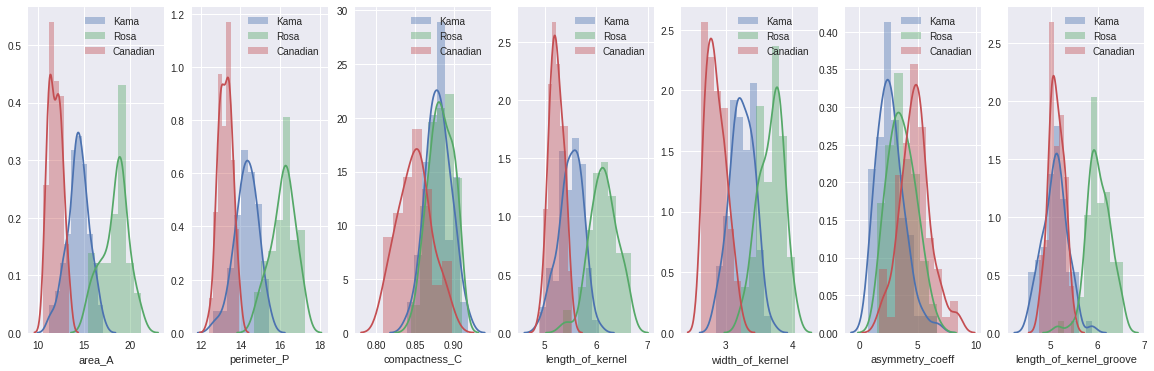

In [15]:
_, ax = plt.subplots(1,7, figsize=(20,6))

for i in range(7):
    for seed_class in SEEDS.target_names.unique():
        group_mask_1 = (seed_class == SEEDS.target_names)
        group_1 = SEEDS[group_mask_1]
        sns.distplot(group_1[feature_names[i]], ax=ax[i], label = seed_class)
        ax[i].legend()

## Benchmark: Dummy Classifier & Train/Test Split

In [16]:
features_numerical = SEEDS.drop("target", axis=1)
features_numerical = features_numerical.drop("target_names", axis=1)
target = np.array(SEEDS.target)
display(features_numerical.head())
display(target)

,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coeff,length_of_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3])

In [17]:
#Train test split
from sklearn.model_selection import train_test_split
(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_numerical, target, random_state=20)

In [18]:
display(features_train.head())
display(features_test.head())

,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coeff,length_of_kernel_groove
160,12.54,13.67,0.8425,5.451,2.879,3.082,5.491
64,12.78,13.57,0.8716,5.262,3.026,1.176,4.782
189,10.59,12.41,0.8648,4.899,2.787,4.975,4.794
59,12.11,13.47,0.8392,5.159,3.032,1.502,4.519
202,11.18,12.72,0.8680,5.009,2.810,4.051,4.828


,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coeff,length_of_kernel_groove
134,15.56,14.89,0.8823,5.776,3.408,4.972,5.847
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
13,13.78,14.06,0.8759,5.479,3.156,3.136,4.872
46,15.36,14.76,0.8861,5.701,3.393,1.367,5.132
62,12.36,13.19,0.8923,5.076,3.042,3.220,4.605


In [19]:
display(target_train)
display(target_test)

array([3, 1, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 1, 2, 1, 3, 2, 2, 1, 2, 2, 2,
       1, 2, 3, 1, 2, 2, 2, 3, 1, 1, 2, 2, 1, 2, 1, 3, 1, 2, 1, 1, 3, 1, 2,
       1, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 3, 2, 3, 1, 2,
       2, 3, 2, 2, 1, 2, 3, 1, 3, 1, 1, 3, 1, 1, 2, 1, 2, 2, 1, 3, 3, 3, 1,
       2, 2, 2, 3, 2, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 2, 1, 1, 2, 3, 1, 2,
       3, 3, 3, 3, 2, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 2, 2, 1, 2, 1, 3, 3, 3,
       1, 1, 2, 2, 3, 3, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 1, 2])

array([2, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 1, 1, 2, 3,
       3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 1, 3, 3, 2, 3, 2,
       3, 3, 3, 2, 2, 2, 1])

In [20]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier("most_frequent")
dummy.fit(features_train, target_train)
dummy_prediction = dummy.predict(features_test)
dummy_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [21]:
#based on dummy classifier, we predict all data is 1. 33% accuracy. 
target_test

array([2, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 1, 1, 2, 3,
       3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 1, 3, 3, 2, 3, 2,
       3, 3, 3, 2, 2, 2, 1])

## Classification - Logistic Model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
#features_numerical include all parameters

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_numerical, target, random_state=20)

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_1 = logistic_model.predict(features_test)
prediction_1

array([2, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 2, 3, 2, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 1, 3, 3, 2, 3, 2,
       3, 3, 3, 2, 2, 2, 1])

In [24]:
difference = np.abs(target_test - prediction_1)
difference

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_test)

pca = PCA(2)
seeds_2d = pca.fit_transform(features_scaled)
seeds_2d[0:5]

array([[ 0.61285548, -0.45809389],
       [-0.53627104,  1.94096216],
       [-1.10761595,  1.23963576],
       [ 0.28907932,  2.00958354],
       [-2.09827491,  1.94866884]])

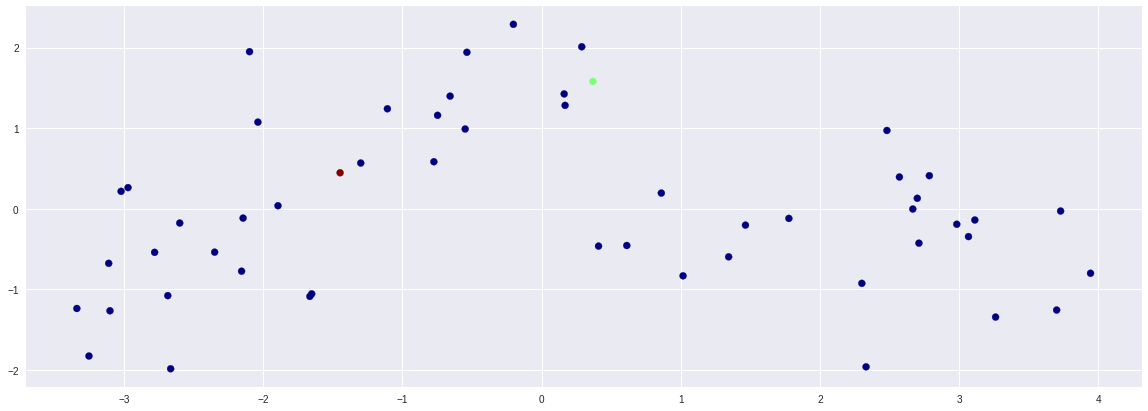

In [26]:
plt.figure(figsize=(20,7))
plt.scatter(seeds_2d[:,0], seeds_2d[:,1], c=difference, cmap=plt.cm.jet)

In [27]:
import math
from sklearn.metrics import log_loss

def BIC(model, features, target):
    model.fit(features, target)
    prediction = model.predict_proba(features)
    n = features.shape[0]
    p = features.shape[1]
    complexity = math.log(n)*(p+1)
    likelihood = -2*log_loss(target, prediction)
    return complexity - likelihood

BIC(logistic_model, features_numerical, SEEDS.target)

43.271406839816628

In [28]:
def accuracy(actual, prediction_1):
     return 1-sum(np.abs(actual-prediction_1)) / (len(actual))
    
from sklearn.metrics import f1_score

print("Accuracy: %f" %accuracy(target_test, prediction_1))
print("f1_score: %f" %f1_score(target_test, prediction_1, average="micro"))
print("BIC: %f" % BIC(logistic_model, features_numerical, target))

Accuracy: 0.943396
f1_score: 0.962264
BIC: 43.271407


In [29]:
features_2 = features_numerical.drop("area_A", axis = 1)#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_2, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_2 = logistic_model.predict(features_test)#
prediction_2#

print("Accuracy: %f" %accuracy(target_test, prediction_2))#
print("f1_score: %f" %f1_score(target_test, prediction_2, average="micro"))
print("BIC: score: %f" %BIC(logistic_model, features_2, target))

Accuracy: 0.849057
f1_score: 0.867925
BIC: score: 38.394061


In [30]:
features_3 = features_numerical.drop("perimeter_P", axis = 1)#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_3, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_3 = logistic_model.predict(features_test)#
prediction_3#

print("Accuracy: %f" %accuracy(target_test, prediction_3))#
print("f1_score: %f" %f1_score(target_test, prediction_3, average="micro"))
print("BIC: score: %f" %BIC(logistic_model, features_3, target))

Accuracy: 0.962264
f1_score: 0.981132
BIC: score: 37.996738


In [31]:
features_4 = features_numerical.drop("compactness_C", axis = 1)#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_4, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_4 = logistic_model.predict(features_test)#
prediction_4#

print("Accuracy: %f" %accuracy(target_test, prediction_4))#
print("f1_score: %f" %f1_score(target_test, prediction_4, average="micro"))
print("BIC: score: %f" %BIC(logistic_model, features_4, target))

Accuracy: 0.943396
f1_score: 0.962264
BIC: score: 37.925692


In [32]:
features_5 = features_numerical.drop("length_of_kernel", axis = 1)#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_5, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_5 = logistic_model.predict(features_test)#
prediction_5#

print("Accuracy: %f" %accuracy(target_test, prediction_5))#
print("f1_score: %f" %f1_score(target_test, prediction_5, average="micro"))
print("BIC: score: %f" %BIC(logistic_model, features_5, target))

Accuracy: 0.943396
f1_score: 0.962264
BIC: score: 37.933236


In [33]:
features_6 = features_numerical.drop("width_of_kernel", axis = 1)#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_6, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_6 = logistic_model.predict(features_test)#
prediction_6#

print("Accuracy: %f" %accuracy(target_test, prediction_6))#
print("f1_score: %f" %f1_score(target_test, prediction_6, average="micro"))
print("BIC: score: %f" %BIC(logistic_model, features_6, target))

Accuracy: 0.943396
f1_score: 0.962264
BIC: score: 37.932785


In [34]:
features_7 = features_numerical.drop("asymmetry_coeff", axis = 1)#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_7, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_7 = logistic_model.predict(features_test)#
prediction_7#

print("Accuracy: %f" %accuracy(target_test, prediction_7))#
print("f1_score: %f" %f1_score(target_test, prediction_7, average="micro"))
print("BIC: score: %f" %BIC(logistic_model, features_7, target))

Accuracy: 0.905660
f1_score: 0.943396
BIC: score: 38.034295


In [35]:
features_8 = features_numerical.drop("length_of_kernel_groove", axis = 1)#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_8, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_8 = logistic_model.predict(features_test)#
prediction_8#

print("Accuracy: %f" %accuracy(target_test, prediction_8))#
print("f1_score: %f" %f1_score(target_test, prediction_8, average="micro"))#
print("BIC: score: %f" %BIC(logistic_model, features_8, target))

Accuracy: 0.962264
f1_score: 0.981132
BIC: score: 38.100161


### Summary for Backward Selection - Accuracy

In [36]:
overall_predictions_1 = [(accuracy(target_test, prediction_1)),
                         (accuracy(target_test, prediction_2)),
                         (accuracy(target_test, prediction_3)),
                         (accuracy(target_test, prediction_4)),
                         (accuracy(target_test, prediction_5)),
                         (accuracy(target_test, prediction_6)),
                         (accuracy(target_test, prediction_7)),
                         (accuracy(target_test, prediction_8))]

features_all = [features_numerical, features_2, features_3, features_4,
                features_5, features_6, features_7, features_8]

for feat, pred in zip(features_all, overall_predictions_1):
    print(feat.columns)
    print("Accuracy: %f" %pred)
    print("") 
    
##Based on the dataset feature 2 or area_A has a lower accuracy it was omitted. 

Index(['area_A', 'perimeter_P', 'compactness_C', 'length_of_kernel',
       'width_of_kernel', 'asymmetry_coeff', 'length_of_kernel_groove'],
      dtype='object')
Accuracy: 0.943396

Index(['perimeter_P', 'compactness_C', 'length_of_kernel', 'width_of_kernel',
       'asymmetry_coeff', 'length_of_kernel_groove'],
      dtype='object')
Accuracy: 0.849057

Index(['area_A', 'compactness_C', 'length_of_kernel', 'width_of_kernel',
       'asymmetry_coeff', 'length_of_kernel_groove'],
      dtype='object')
Accuracy: 0.962264

Index(['area_A', 'perimeter_P', 'length_of_kernel', 'width_of_kernel',
       'asymmetry_coeff', 'length_of_kernel_groove'],
      dtype='object')
Accuracy: 0.943396

Index(['area_A', 'perimeter_P', 'compactness_C', 'width_of_kernel',
       'asymmetry_coeff', 'length_of_kernel_groove'],
      dtype='object')
Accuracy: 0.943396

Index(['area_A', 'perimeter_P', 'compactness_C', 'length_of_kernel',
       'asymmetry_coeff', 'length_of_kernel_groove'],
      dtype='object

In [37]:
features_2a = features_numerical[["area_A"]]#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_2a, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_2a = logistic_model.predict(features_test)#
prediction_2a#

print("Accuracy: %f" %accuracy(target_test, prediction_2a))#
print("f1_score: %f" %f1_score(target_test, prediction_2a, average="micro"))#
print("BIC: score: %f" %BIC(logistic_model, features_2a, target))

Accuracy: 0.886792
f1_score: 0.943396
BIC: score: 12.115507


In [38]:
features_3a = features_numerical[["perimeter_P"]]#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_3a, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_3a = logistic_model.predict(features_test)#
prediction_3a#

print("Accuracy: %f" %accuracy(target_test, prediction_3a))#
print("f1_score: %f" %f1_score(target_test, prediction_3a, average="micro"))#
print("BIC: score: %f" %BIC(logistic_model, features_3a, target))

Accuracy: 0.566038
f1_score: 0.754717
BIC: score: 12.503907


In [39]:
features_4a = features_numerical[["compactness_C"]]#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_4a, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_4a = logistic_model.predict(features_test)#
prediction_4a#

print("Accuracy: %f" %accuracy(target_test, prediction_4a))#
print("f1_score: %f" %f1_score(target_test, prediction_4a, average="micro"))#
print("BIC: score: %f" %BIC(logistic_model, features_4a, target))

Accuracy: -0.113208
f1_score: 0.226415
BIC: score: 12.879199


In [40]:
features_5a = features_numerical[["length_of_kernel"]]#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_5a, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_5a = logistic_model.predict(features_test)#
prediction_5a#

print("Accuracy: %f" %accuracy(target_test, prediction_5a))#
print("f1_score: %f" %f1_score(target_test, prediction_5a, average="micro"))#
print("BIC: score: %f" %BIC(logistic_model, features_5a, target))

Accuracy: 0.320755
f1_score: 0.622642
BIC: score: 12.601649


In [41]:
features_6a = features_numerical[["width_of_kernel"]]#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_6a, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_6a = logistic_model.predict(features_test)#
prediction_6a#

print("Accuracy: %f" %accuracy(target_test, prediction_6a))#
print("f1_score: %f" %f1_score(target_test, prediction_6a, average="micro"))#
print("BIC: score: %f" %BIC(logistic_model, features_6a, target))

Accuracy: 0.811321
f1_score: 0.867925
BIC: score: 12.420367


In [42]:
features_7a = features_numerical[["asymmetry_coeff"]]#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_7a, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_7a = logistic_model.predict(features_test)#
prediction_7a#

print("Accuracy: %f" %accuracy(target_test, prediction_7a))#
print("f1_score: %f" %f1_score(target_test, prediction_7a, average="micro"))#
print("BIC: score: %f" %BIC(logistic_model, features_7a, target))

Accuracy: 0.490566
f1_score: 0.528302
BIC: score: 12.530798


In [43]:
features_8a = features_numerical[["length_of_kernel_groove"]]#

(features_train,
 features_test,
 target_train,
 target_test) = train_test_split(features_8a, target, random_state=20)#

logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)
prediction_8a = logistic_model.predict(features_test)#
prediction_8a#

print("Accuracy: %f" %accuracy(target_test, prediction_8a))#
print("f1_score: %f" %f1_score(target_test, prediction_8a, average="micro"))#
print("BIC: score: %f" %BIC(logistic_model, features_8a, target))

Accuracy: 0.301887
f1_score: 0.641509
BIC: score: 12.535999


### Summary for Forward Selection - Accuracy

In [44]:
overall_predictions_2 = [(accuracy(target_test, prediction_2a)),
                         (accuracy(target_test, prediction_3a)),
                         (accuracy(target_test, prediction_4a)),
                         (accuracy(target_test, prediction_5a)),
                         (accuracy(target_test, prediction_6a)),
                         (accuracy(target_test, prediction_7a)),
                         (accuracy(target_test, prediction_8a)),]

for feat, pred in zip(feature_names, overall_predictions_2):
    print("Accuracy for %s" %feat)
    print(pred)
    print("")
    
#We can conclude that area_A is still very important on determining target. Compactness and length of kernel is the least impactful. 

Accuracy for area_A
0.88679245283

Accuracy for perimeter_P
0.566037735849

Accuracy for compactness_C
-0.11320754717

Accuracy for length_of_kernel
0.320754716981

Accuracy for width_of_kernel
0.811320754717

Accuracy for asymmetry_coeff
0.490566037736

Accuracy for length_of_kernel_groove
0.301886792453



#### Prediction without Train-test-split

In [45]:
logistic_models = [LogisticRegression(),
                   LogisticRegression(),
                   LogisticRegression(),
                   LogisticRegression(),
                   LogisticRegression(),
                   LogisticRegression(),
                   LogisticRegression(),] #list
for feat, model in zip(feature_names, logistic_models):
    print("fitting %s with target on logistic model" %feat)
    features = SEEDS[[feat]]
    target = SEEDS.target
    model.fit(features, target)

fitting area_A with target on logistic model
fitting perimeter_P with target on logistic model
fitting compactness_C with target on logistic model
fitting length_of_kernel with target on logistic model
fitting width_of_kernel with target on logistic model
fitting asymmetry_coeff with target on logistic model
fitting length_of_kernel_groove with target on logistic model


In [46]:
for feat, model in zip(feature_names, logistic_models):
    features = SEEDS[[feat]]
    target = SEEDS.target
    print("Logistic Model fit for %s" %feat)
    print("Accuracy: %f" %accuracy(target, model.predict(features)))
    print("f1_score: %f" %f1_score(target, model.predict(features), average="micro")) 
    print("BIC: score: %f" %BIC(logistic_model, features, target))
    print("")
#Area_A is still the most important.

Logistic Model fit for area_A
Accuracy: 0.723810
f1_score: 0.804762
BIC: score: 12.115507

Logistic Model fit for perimeter_P
Accuracy: 0.604762
f1_score: 0.719048
BIC: score: 12.503907

Logistic Model fit for compactness_C
Accuracy: 0.500000
f1_score: 0.509524
BIC: score: 12.879199

Logistic Model fit for length_of_kernel
Accuracy: 0.519048
f1_score: 0.666667
BIC: score: 12.601649

Logistic Model fit for width_of_kernel
Accuracy: 0.638095
f1_score: 0.728571
BIC: score: 12.420367

Logistic Model fit for asymmetry_coeff
Accuracy: 0.476190
f1_score: 0.571429
BIC: score: 12.530798

Logistic Model fit for length_of_kernel_groove
Accuracy: 0.342857
f1_score: 0.604762
BIC: score: 12.535999



In [47]:
#Defining my own BIC function. 
from sklearn.metrics import log_loss
import math

## Clustering KMeans Model

In [48]:
from bic import BIC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [49]:
features_numerical.head()

,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coeff,length_of_kernel_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


### Analyze all features

In [50]:
ks = range(2,21)
kmeans_models = []
def KMeans_fit(data):
    for k in (ks):
        model = KMeans(n_clusters=k).fit(data)
        kmeans_models.append(model)
    return kmeans_models

results = KMeans_fit(features_numerical)

In [51]:
def cluster_df(fit_results, data):
    df = pd.DataFrame(fit_results, columns=["model"])
    df["k"] = df.model.apply(lambda x: x.n_clusters)
    df["bic"] = df.model.apply(lambda x: BIC(x, data))
    df["sil_sc"] = df.model.apply(lambda x: silhouette_score(data, x.labels_))
    df.set_index("k", inplace=True)
    return df

In [52]:
features_all = cluster_df(results, features_numerical)
features_all

,model,bic,sil_sc
k,,,
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",3990.746374,0.518287
3,"KMeans(algorithm='auto', copy_x=True, init='k-...",3410.982073,0.471934
4,"KMeans(algorithm='auto', copy_x=True, init='k-...",3246.669601,0.396465
5,"KMeans(algorithm='auto', copy_x=True, init='k-...",3083.641286,0.361323
6,"KMeans(algorithm='auto', copy_x=True, init='k-...",2930.573143,0.366565
7,"KMeans(algorithm='auto', copy_x=True, init='k-...",2810.806864,0.352465
8,"KMeans(algorithm='auto', copy_x=True, init='k-...",2704.994903,0.361192
9,"KMeans(algorithm='auto', copy_x=True, init='k-...",2645.994007,0.359210
10,"KMeans(algorithm='auto', copy_x=True, init='k-...",2608.336437,0.346073


In [53]:
features_all.sort("sil_sc", ascending = False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,model,bic,sil_sc
k,,,
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",3990.746374,0.518287
3,"KMeans(algorithm='auto', copy_x=True, init='k-...",3410.982073,0.471934
4,"KMeans(algorithm='auto', copy_x=True, init='k-...",3246.669601,0.396465
6,"KMeans(algorithm='auto', copy_x=True, init='k-...",2930.573143,0.366565
5,"KMeans(algorithm='auto', copy_x=True, init='k-...",3083.641286,0.361323
8,"KMeans(algorithm='auto', copy_x=True, init='k-...",2704.994903,0.361192
9,"KMeans(algorithm='auto', copy_x=True, init='k-...",2645.994007,0.359210
7,"KMeans(algorithm='auto', copy_x=True, init='k-...",2810.806864,0.352465
12,"KMeans(algorithm='auto', copy_x=True, init='k-...",2500.910310,0.349686


In [54]:
features_all.sort("bic")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


,model,bic,sil_sc
k,,,
20,"KMeans(algorithm='auto', copy_x=True, init='k-...",2315.727819,0.322596
19,"KMeans(algorithm='auto', copy_x=True, init='k-...",2342.418403,0.319956
18,"KMeans(algorithm='auto', copy_x=True, init='k-...",2346.807466,0.324008
17,"KMeans(algorithm='auto', copy_x=True, init='k-...",2350.465744,0.327394
16,"KMeans(algorithm='auto', copy_x=True, init='k-...",2363.374090,0.322940
15,"KMeans(algorithm='auto', copy_x=True, init='k-...",2444.297424,0.319555
14,"KMeans(algorithm='auto', copy_x=True, init='k-...",2452.599588,0.322675
13,"KMeans(algorithm='auto', copy_x=True, init='k-...",2483.898678,0.331645
12,"KMeans(algorithm='auto', copy_x=True, init='k-...",2500.910310,0.349686


In [55]:
#BIC is off, so we will normalize using 2 ways.
def Normalize(data):
    data_norm = (data - data.mean()) / data.std()
    return data_norm

features_norm = Normalize(features_numerical)
features_norm.head()

,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coeff,length_of_kernel_groove
0,0.141759,0.214949,0.000060,0.303493,0.141364,-0.983801,-0.382663
1,0.011161,0.008204,0.427494,-0.168223,0.196962,-1.783904,-0.919816
2,-0.191609,-0.359342,1.438945,-0.761817,0.207552,-0.665888,-1.186357
3,-0.346264,-0.474200,1.036904,-0.687336,0.318747,-0.958528,-1.227051
4,0.444196,0.329807,1.371233,0.066507,0.803240,-1.559768,-0.474223


In [56]:
#Alternative Way
def Normalize_1(data):
    data_norm = (data - data.mean()) / (data.max() - data.min())
    return data_norm

Normalize_1(features_numerical).head()

#features_norm = Normalize_1(features_numerical)
#features_norm.head()


,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coeff,length_of_kernel_groove
0,0.038950,0.057999,0.000013,0.075713,0.038058,-0.192331,-0.092600
1,0.003067,0.002214,0.091665,-0.041967,0.053026,-0.348750,-0.222586
2,-0.052646,-0.096960,0.308543,-0.190053,0.055877,-0.130180,-0.287086
3,-0.095139,-0.127952,0.222336,-0.171471,0.085813,-0.187390,-0.296933
4,0.122047,0.088991,0.294024,0.016592,0.216247,-0.304932,-0.114757


In [57]:
#2nd Alternative Way

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_numerical_scaled = scaler.fit_transform(features_numerical)
features_numerical_scaled = pd.DataFrame(features_numerical_scaled, columns = ['area_A', 'perimeter_P', 'compactness_C', 'length_of_kernel',
       'width_of_kernel', 'asymmetry_coeff', 'length_of_kernel_groove'])
features_numerical_scaled.head()

,area_A,perimeter_P,compactness_C,length_of_kernel,width_of_kernel,asymmetry_coeff,length_of_kernel_groove
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [58]:
#Use feature_norms. (first way)
ks = range(2,21)
kmeans_models_1 = []
def KMeans_fit_1(data):
    columns = []
    for k in (ks):
        model = KMeans(n_clusters=k).fit(data)
        kmeans_models_1.append(model)
    return kmeans_models_1

results_2 = KMeans_fit_1(features_norm)
features_norm_all = cluster_df(results_2, features_norm)
features_norm_all.sort("bic")

#BIC is still off after normalizing. 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  del sys.path[0]


,model,bic,sil_sc
k,,,
14,"KMeans(algorithm='auto', copy_x=True, init='k-...",2613.769855,0.245682
13,"KMeans(algorithm='auto', copy_x=True, init='k-...",2614.945564,0.259562
12,"KMeans(algorithm='auto', copy_x=True, init='k-...",2621.603326,0.252320
16,"KMeans(algorithm='auto', copy_x=True, init='k-...",2622.199277,0.241438
11,"KMeans(algorithm='auto', copy_x=True, init='k-...",2624.867659,0.249231
17,"KMeans(algorithm='auto', copy_x=True, init='k-...",2631.076823,0.249947
18,"KMeans(algorithm='auto', copy_x=True, init='k-...",2633.151497,0.245781
10,"KMeans(algorithm='auto', copy_x=True, init='k-...",2635.861595,0.264274
19,"KMeans(algorithm='auto', copy_x=True, init='k-...",2640.298296,0.237247


In [59]:
#Let's use 2nd alternative way:

ks = range(2,21)
kmeans_models_2 = []
def KMeans_fit_2(data):
    columns = []
    for k in (ks):
        model = KMeans(n_clusters=k).fit(data)
        kmeans_models_2.append(model)
    return kmeans_models_2

results_3 = KMeans_fit_2(features_numerical_scaled)
features_numerical_scaled_kmeans = cluster_df(results_3, features_numerical_scaled)
features_numerical_scaled_kmeans.sort("bic")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,model,bic,sil_sc
k,,,
12,"KMeans(algorithm='auto', copy_x=True, init='k-...",2618.875471,0.253937
15,"KMeans(algorithm='auto', copy_x=True, init='k-...",2629.658140,0.250175
18,"KMeans(algorithm='auto', copy_x=True, init='k-...",2630.169661,0.240896
16,"KMeans(algorithm='auto', copy_x=True, init='k-...",2641.074303,0.243044
13,"KMeans(algorithm='auto', copy_x=True, init='k-...",2641.252663,0.246302
11,"KMeans(algorithm='auto', copy_x=True, init='k-...",2646.002559,0.252629
17,"KMeans(algorithm='auto', copy_x=True, init='k-...",2648.393224,0.245967
19,"KMeans(algorithm='auto', copy_x=True, init='k-...",2651.212081,0.254954
14,"KMeans(algorithm='auto', copy_x=True, init='k-...",2652.507546,0.238722


Text(0,0.5,'Sil_Score')

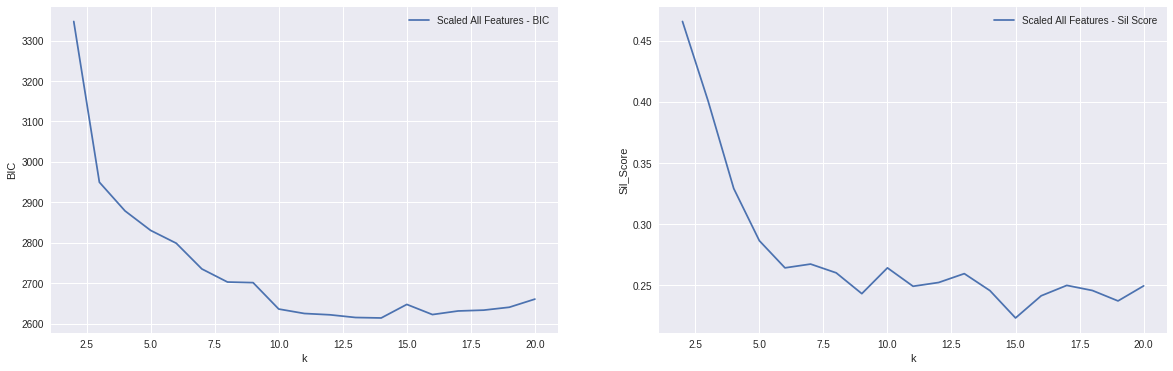

In [60]:
#Plot for Normalize 1
_, ax = plt.subplots(1,2, figsize = (20,6))

ax[0].plot(features_norm_all.index, features_norm_all.bic.values, label="Scaled All Features - BIC")
ax[0].legend()
ax[0].set_xlabel("k")
ax[0].set_ylabel("BIC")
ax[1].plot(features_norm_all.index, features_norm_all.sil_sc.values, label="Scaled All Features - Sil Score")
ax[1].legend()
ax[1].set_xlabel("k")
ax[1].set_ylabel("Sil_Score")

Text(0,0.5,'Sil_Score')

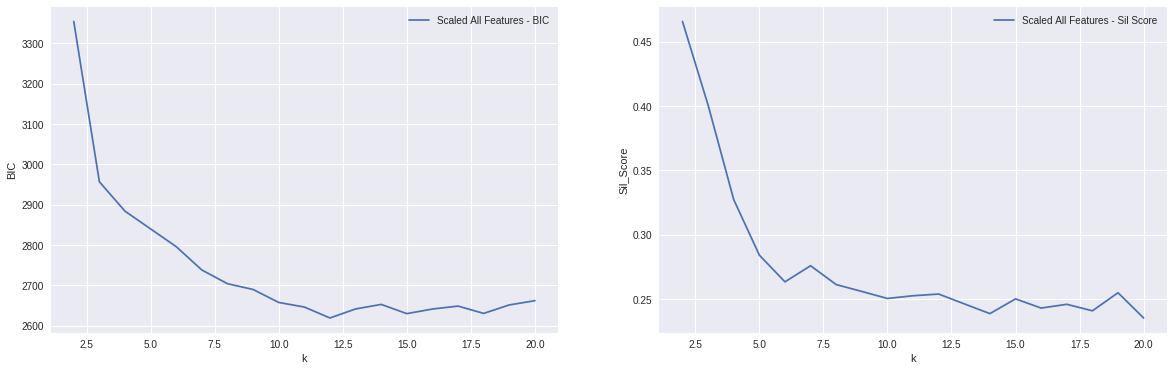

In [61]:
#Plot for Normalize 2
_, ax = plt.subplots(1,2, figsize = (20,6))

ax[0].plot(features_numerical_scaled_kmeans.index, features_numerical_scaled_kmeans.bic.values, label="Scaled All Features - BIC")
ax[0].legend()
ax[0].set_xlabel("k")
ax[0].set_ylabel("BIC")
ax[1].plot(features_numerical_scaled_kmeans.index, features_numerical_scaled_kmeans.sil_sc.values, label="Scaled All Features - Sil Score")
ax[1].legend()
ax[1].set_xlabel("k")
ax[1].set_ylabel("Sil_Score")

In [62]:
len(features_numerical_scaled_kmeans.bic.values)

19

### Test KMeans by every feature

In [63]:
ks = range(2,21)

def create_cluster_df(data):
    kmeans_models = []
    for k in (ks):
        model = KMeans(n_clusters=k, random_state=20).fit(data)
        kmeans_models.append(model)
    df = pd.DataFrame(kmeans_models, columns=["model"])
    df["k"] = df.model.apply(lambda x: x.n_clusters)
    df["bic"] = df.model.apply(lambda x: BIC(x, data))
    df["sil_sc"] = df.model.apply(lambda x: silhouette_score(data, x.labels_))
    df.set_index("k", inplace=True)
    return df

In [64]:
features_cluster_1 = features_numerical[["area_A"]]

print("Best Fit by BIC:")
display(create_cluster_df(features_cluster_1).sort("bic").head())
print("Best Fit by Silhouette Score")
display(create_cluster_df(features_cluster_1).sort("sil_sc", ascending=False).head())

Best Fit by BIC:


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  after removing the cwd from sys.path.


,model,bic,sil_sc
k,,,
3,"KMeans(algorithm='auto', copy_x=True, init='k-...",1025.144171,0.641617
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",1044.803833,0.642037
4,"KMeans(algorithm='auto', copy_x=True, init='k-...",1048.503489,0.600952
7,"KMeans(algorithm='auto', copy_x=True, init='k-...",1061.443047,0.588927
6,"KMeans(algorithm='auto', copy_x=True, init='k-...",1066.773212,0.578510


Best Fit by Silhouette Score


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,model,bic,sil_sc
k,,,
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",1044.803833,0.642037
3,"KMeans(algorithm='auto', copy_x=True, init='k-...",1025.144171,0.641617
4,"KMeans(algorithm='auto', copy_x=True, init='k-...",1048.503489,0.600952
18,"KMeans(algorithm='auto', copy_x=True, init='k-...",1135.164931,0.599210
17,"KMeans(algorithm='auto', copy_x=True, init='k-...",1125.720567,0.597087


In [65]:
features_cluster_2 = features_numerical[["perimeter_P"]]

print("Best Fit by BIC:")
display(create_cluster_df(features_cluster_2).sort("bic").head())
print("Best Fit by Silhouette Score")
display(create_cluster_df(features_cluster_2).sort("sil_sc", ascending=False).head())

Best Fit by BIC:


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  after removing the cwd from sys.path.


,model,bic,sil_sc
k,,,
3,"KMeans(algorithm='auto', copy_x=True, init='k-...",698.321912,0.625180
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",704.791774,0.646427
4,"KMeans(algorithm='auto', copy_x=True, init='k-...",735.579856,0.568981
7,"KMeans(algorithm='auto', copy_x=True, init='k-...",755.241622,0.558845
5,"KMeans(algorithm='auto', copy_x=True, init='k-...",756.178449,0.547914


Best Fit by Silhouette Score


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,model,bic,sil_sc
k,,,
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",704.791774,0.646427
3,"KMeans(algorithm='auto', copy_x=True, init='k-...",698.321912,0.625180
12,"KMeans(algorithm='auto', copy_x=True, init='k-...",797.282509,0.570587
4,"KMeans(algorithm='auto', copy_x=True, init='k-...",735.579856,0.568981
13,"KMeans(algorithm='auto', copy_x=True, init='k-...",816.935766,0.564681


In [66]:
features_cluster_3 = features_numerical[["compactness_C"]]

print("Best Fit by BIC:")
display(create_cluster_df(features_cluster_3).sort("bic").head())
print("Best Fit by Silhouette Score")
display(create_cluster_df(features_cluster_3).sort("sil_sc", ascending=False).head())

Best Fit by BIC:


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  after removing the cwd from sys.path.


,model,bic,sil_sc
k,,,
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",-901.739596,0.568617
5,"KMeans(algorithm='auto', copy_x=True, init='k-...",-890.842596,0.557502
3,"KMeans(algorithm='auto', copy_x=True, init='k-...",-888.879418,0.543540
4,"KMeans(algorithm='auto', copy_x=True, init='k-...",-882.419747,0.553168
6,"KMeans(algorithm='auto', copy_x=True, init='k-...",-862.101495,0.549651


Best Fit by Silhouette Score


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,model,bic,sil_sc
k,,,
15,"KMeans(algorithm='auto', copy_x=True, init='k-...",-838.180519,0.592442
14,"KMeans(algorithm='auto', copy_x=True, init='k-...",-829.835914,0.590865
12,"KMeans(algorithm='auto', copy_x=True, init='k-...",-848.426530,0.584516
17,"KMeans(algorithm='auto', copy_x=True, init='k-...",-804.937009,0.583553
16,"KMeans(algorithm='auto', copy_x=True, init='k-...",-806.238324,0.581051


In [67]:
features_cluster_4 = features_numerical[["length_of_kernel"]]

print("Best Fit by BIC:")
display(create_cluster_df(features_cluster_4).sort("bic").head())
print("Best Fit by Silhouette Score")
display(create_cluster_df(features_cluster_4).sort("sil_sc", ascending=False).head())

Best Fit by BIC:


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  after removing the cwd from sys.path.


,model,bic,sil_sc
k,,,
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",258.539073,0.645234
3,"KMeans(algorithm='auto', copy_x=True, init='k-...",287.639490,0.582160
5,"KMeans(algorithm='auto', copy_x=True, init='k-...",293.611046,0.573482
6,"KMeans(algorithm='auto', copy_x=True, init='k-...",315.218650,0.556751
4,"KMeans(algorithm='auto', copy_x=True, init='k-...",324.217719,0.557940


Best Fit by Silhouette Score


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,model,bic,sil_sc
k,,,
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",258.539073,0.645234
16,"KMeans(algorithm='auto', copy_x=True, init='k-...",408.023171,0.583766
18,"KMeans(algorithm='auto', copy_x=True, init='k-...",419.947550,0.583510
20,"KMeans(algorithm='auto', copy_x=True, init='k-...",414.680362,0.582679
3,"KMeans(algorithm='auto', copy_x=True, init='k-...",287.639490,0.582160


In [68]:
features_cluster_5 = features_numerical[["width_of_kernel"]]

print("Best Fit by BIC:")
display(create_cluster_df(features_cluster_5).sort("bic").head())
print("Best Fit by Silhouette Score")
display(create_cluster_df(features_cluster_5).sort("sil_sc", ascending=False).head())

Best Fit by BIC:


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  after removing the cwd from sys.path.


,model,bic,sil_sc
k,,,
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",216.827718,0.615568
4,"KMeans(algorithm='auto', copy_x=True, init='k-...",217.875254,0.596397
3,"KMeans(algorithm='auto', copy_x=True, init='k-...",220.711165,0.591922
5,"KMeans(algorithm='auto', copy_x=True, init='k-...",236.299045,0.587089
6,"KMeans(algorithm='auto', copy_x=True, init='k-...",256.389310,0.559839


Best Fit by Silhouette Score


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,model,bic,sil_sc
k,,,
16,"KMeans(algorithm='auto', copy_x=True, init='k-...",288.148985,0.625853
18,"KMeans(algorithm='auto', copy_x=True, init='k-...",306.404338,0.619723
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",216.827718,0.615568
19,"KMeans(algorithm='auto', copy_x=True, init='k-...",318.941284,0.611620
17,"KMeans(algorithm='auto', copy_x=True, init='k-...",308.980302,0.609356


In [69]:
features_cluster_6 = features_numerical[["asymmetry_coeff"]]

print("Best Fit by BIC:")
display(create_cluster_df(features_cluster_6).sort("bic").head())
print("Best Fit by Silhouette Score")
display(create_cluster_df(features_cluster_6).sort("sil_sc", ascending=False).head())

Best Fit by BIC:


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  after removing the cwd from sys.path.


,model,bic,sil_sc
k,,,
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",841.464472,0.587904
4,"KMeans(algorithm='auto', copy_x=True, init='k-...",874.970216,0.544457
11,"KMeans(algorithm='auto', copy_x=True, init='k-...",881.403860,0.598240
7,"KMeans(algorithm='auto', copy_x=True, init='k-...",887.229342,0.547817
3,"KMeans(algorithm='auto', copy_x=True, init='k-...",888.885461,0.530788


Best Fit by Silhouette Score


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,model,bic,sil_sc
k,,,
13,"KMeans(algorithm='auto', copy_x=True, init='k-...",918.924519,0.599054
11,"KMeans(algorithm='auto', copy_x=True, init='k-...",881.403860,0.598240
14,"KMeans(algorithm='auto', copy_x=True, init='k-...",913.216670,0.597745
10,"KMeans(algorithm='auto', copy_x=True, init='k-...",891.286640,0.595442
12,"KMeans(algorithm='auto', copy_x=True, init='k-...",901.331376,0.591020


In [70]:
features_cluster_7 = features_numerical[["length_of_kernel_groove"]]

print("Best Fit by BIC:")
display(create_cluster_df(features_cluster_7).sort("bic").head())
print("Best Fit by Silhouette Score")
display(create_cluster_df(features_cluster_7).sort("sil_sc", ascending=False).head())

Best Fit by BIC:


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  after removing the cwd from sys.path.


,model,bic,sil_sc
k,,,
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",232.978740,0.727990
5,"KMeans(algorithm='auto', copy_x=True, init='k-...",313.569129,0.576560
4,"KMeans(algorithm='auto', copy_x=True, init='k-...",317.436036,0.557355
3,"KMeans(algorithm='auto', copy_x=True, init='k-...",327.688177,0.575519
10,"KMeans(algorithm='auto', copy_x=True, init='k-...",342.276103,0.592332


Best Fit by Silhouette Score


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


,model,bic,sil_sc
k,,,
2,"KMeans(algorithm='auto', copy_x=True, init='k-...",232.978740,0.727990
20,"KMeans(algorithm='auto', copy_x=True, init='k-...",443.770714,0.638887
19,"KMeans(algorithm='auto', copy_x=True, init='k-...",425.272587,0.622991
15,"KMeans(algorithm='auto', copy_x=True, init='k-...",390.761058,0.616073
14,"KMeans(algorithm='auto', copy_x=True, init='k-...",368.352193,0.613834


##### Based on previous testing. Feature area_A has the best accuracy. In terms of clusters it yields cluster of 2 and 3 when using the BIC and Silhouette Score.

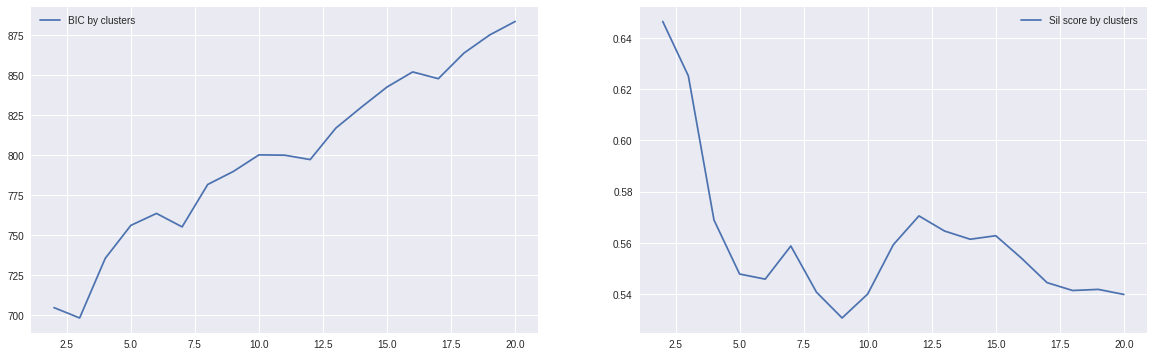

In [71]:
#area_A and perimeter_P are the most accurate fit: Display bic and sil score for perimeter_P.
features_cluster_2 = features_numerical[["perimeter_P"]]


pp_df = create_cluster_df(features_cluster_2)

_, ax = plt.subplots(1,2, figsize=(20,6))
ax[0].plot(pp_df.index, pp_df.bic, label = "BIC by clusters")
ax[0].legend()
ax[1].plot(pp_df.index, pp_df.sil_sc, label = "Sil score by clusters")
ax[1].legend()

In [ ]:
#Normalize
features_cluster_2_scaled = features_numerical_scaled[["area_A"]]


pp_df_scaled = create_cluster_df(features_cluster_2_scaled)

_, ax = plt.subplots(1,2, figsize=(20,6))
ax[0].plot(pp_df_scaled.index, pp_df_scaled.bic, label = "BIC by clusters")
ax[0].legend()
ax[1].plot(pp_df_scaled.index, pp_df_scaled.sil_sc, label = "Sil score by clusters")
ax[1].legend()

In [72]:
Kmeans_2 = KMeans(n_clusters=2, random_state=20).fit(SEEDS[["area_A"]])
Kmeans_3 = KMeans(n_clusters=3, random_state=20).fit(SEEDS[["area_A"]])
Kmeans_4 = KMeans(n_clusters=4, random_state=20).fit(SEEDS[["area_A"]])

Text(0.5,1,'Cluster_4 fit on area_A')

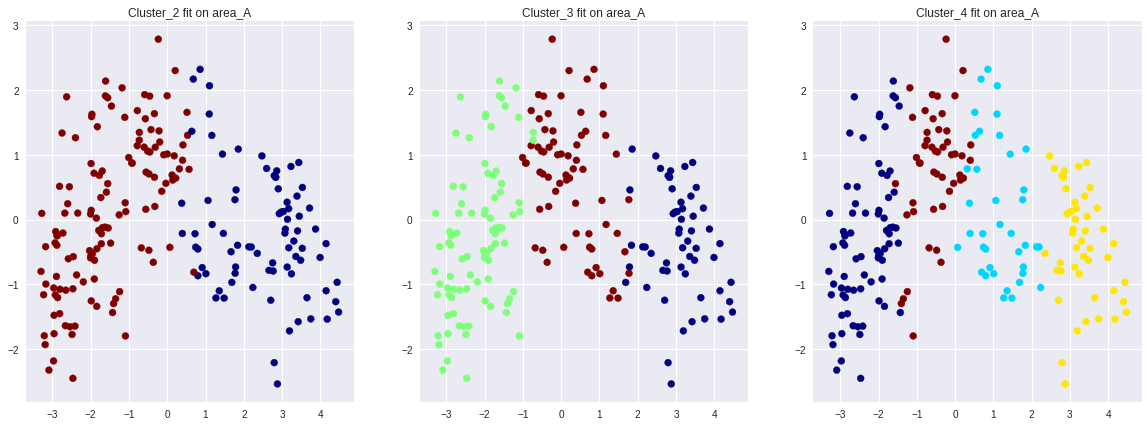

In [73]:
#Based on best feature area_A and best clustesr 2,3,4.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(2)
scaler = StandardScaler()

seeds_scaled = scaler.fit_transform(features_numerical)
seeds_2d = pca.fit_transform(seeds_scaled)

_, ax = plt.subplots(1,3,figsize = (20,7))

ax[0].scatter(seeds_2d[:,0], seeds_2d[:,1], c=Kmeans_2.labels_, cmap=plt.cm.jet)
ax[0].set_title("Cluster_2 fit on area_A")
ax[1].scatter(seeds_2d[:,0], seeds_2d[:,1], c=Kmeans_3.labels_, cmap=plt.cm.jet)
ax[1].set_title("Cluster_3 fit on area_A")
ax[2].scatter(seeds_2d[:,0], seeds_2d[:,1], c=Kmeans_4.labels_, cmap=plt.cm.jet)
ax[2].set_title("Cluster_4 fit on area_A")

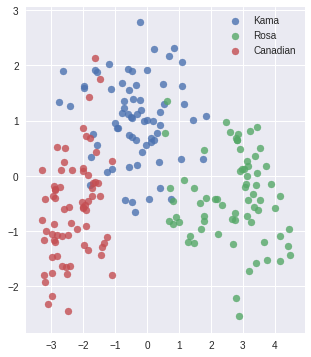

In [74]:
#Actual plot of 3 classes:
plt.figure(figsize=(5,6))

for label in SEEDS.target_names.unique():
    group_mask_actual = (label == SEEDS.target_names)
    group_actual = seeds_2d[group_mask_actual]
    plt.scatter(group_actual[:,0], group_actual[:,1], label=label, alpha=0.8)
    plt.legend()